# Homework Assignment 2 | DarrenkLee

## Section 1: Admissions Dataset

In [30]:
#First round of imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#data
admissions = pd.read_csv("../data/dataset-ucla-admissions.csv")

admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


**Question 1:**

What is the target/outcome variable? What are the features? Which features are continous or categorical? What is the null accuracy? If there are categorical variables, turn them into dummy variables and concatenate them with the data.

In [4]:
#The target/outcome variable is the "admit" field. All of the variables are continuous, but "admit" should be 
#categorical. 

In [5]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [6]:
admissions.prestige.value_counts()

2.0    150
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

In [7]:
df_admit_dums = pd.get_dummies(admissions.admit, prefix = "admit", drop_first= True)
admissions = pd.concat([admissions, df_admit_dums], axis = 1)
admissions.drop("admit", axis = 1, inplace= True)

In [8]:
#admissions["admit_1"] = admissions.admit_1.astype(str)

In [9]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
admit_1     400 non-null uint8
dtypes: float64(3), uint8(1)
memory usage: 9.8 KB


In [10]:
#null accuracy
admissions.admit_1.value_counts(normalize= True)*100

0    68.25
1    31.75
Name: admit_1, dtype: float64

In [11]:
admissions.dropna(inplace= True)

In [12]:
admissions.shape

(397, 4)

**Question 2:**

What do you think is the goal of using machine learning with this dataset.

In [13]:
#The goal is to build a model that can predict what type of students are admitted based on gpa, gre and prestige

**Question 3:** Make a scatter plot of gpa vs gre color-encoded using the admit feature. What does this graph tell you?

In [14]:
admissions.gpa.min()

2.2599999999999998

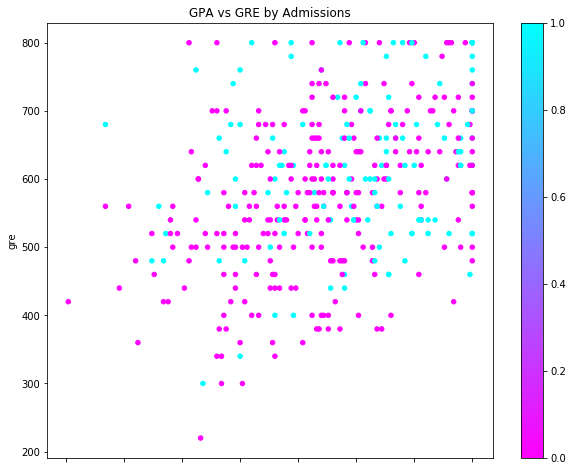

In [15]:
admissions.plot(x = "gpa", y = "gre", kind = "scatter", c = admissions.admit_1, 
                colormap = "cool_r", title = "GPA vs GRE by Admissions", figsize=( 10, 8));

**Question 4:** 

    - 1. Make a train test split using a quarter of the data for testing.
    - 2. Fit a Logistic Regression model on the training data.
    - 3. Evaluate the model on both the training and testing datasets using accuracy score.
    - 4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

In [2]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import pandas as pd;

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
X = admissions.drop("admit_1", axis = 1)
y = admissions.admit_1

#1. Make a train test split using a quarter of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=123)

In [18]:
#Null accuracy of y_test
y_test.value_counts(normalize= True)*100

0    67.0
1    33.0
Name: admit_1, dtype: float64

In [19]:
#2. Fit a Logistic Regression model on the training data.
lr = LogisticRegression()
lr.fit(X_train, y_train)

#3. Evaluate the model on both the training and testing datasets using accuracy score.
score = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)

print ("The training model produces an accuracy score of {:.2f}%, and testing model produces an accuracy score of {:.2f}%".format(score*100, score_test*100))

The training model produces an accuracy score of 69.02%, and testing model produces an accuracy score of 73.00%


In [20]:
#4. Whats difference in the accuracy score of training and testing datasets? Is this evidence of overfitting?

#There is about a 4% difference between the training and testing accuracy score, and the Cross Validated average 
# accuracy score is ~71%. Not too bad considering these numbers are within 2% standard deviation. I would say it's 
# not overfit to the training set.

In [21]:
preds = lr.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, preds)
confusion_matrix = pd.DataFrame(cm)
confusion_matrix

,0,1
0,67,0
1,27,6


In [23]:
#the model produces more False Negatives which is better than producing more False Positives because
# it's worse if we predict that a student will be admitted, but is not actually qualified. The Type I Error
# would be to be on the safe side and not get their hopes up, or set them up for higher expectations.

In [24]:

ps = precision_score(y_test, preds)
rs = recall_score(y_test, preds)

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps*100, rs*100))

The precision score is 100.00 and the recall score is 18.18


In [49]:
#FNR, #27/33
fnr = cm[1,0]/float(cm.sum(axis=1)[1])
print ("We have a False Negative Rate of {:.2f}%".format(fnr*100))

We have a False Negative Rate of 81.82%


In [26]:
cross_val_score(LogisticRegression(), X, y, cv =5, scoring="accuracy").mean()

0.71036099390529761

In [27]:
#Precision
cross_val_score(LogisticRegression(), X, y, cv =5, scoring="precision").mean()

0.61341269841269841

In [28]:
#Recall
cross_val_score(LogisticRegression(), X, y, cv =5, scoring="recall").mean()

0.23815384615384616

In [29]:
#Derive probabilities of class 1 from the test set
test_probs = lr.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Outputs the fpr, tpr, for varying thresholds

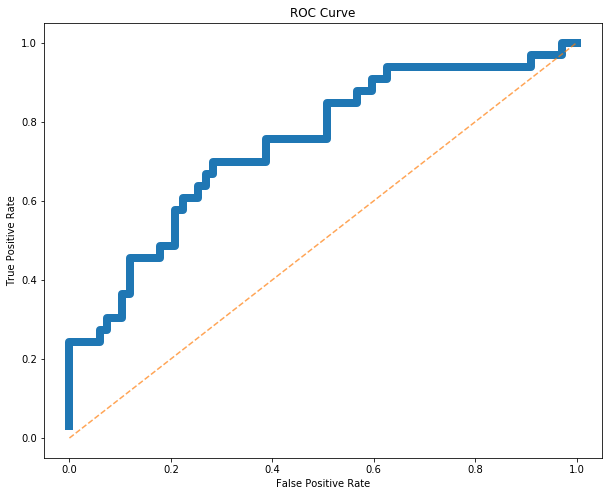

In [30]:
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linewidth= 8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [31]:
#Caculate the area under the curve score using roc_auc_score using SKLEARN. only work with Binary Classification
roc_auc_score(y_test, test_probs)

0.74219810040705569

In [32]:
#Cross validated roc_auc score
cross_val_score(LogisticRegression(), X, y, cv=5, scoring="roc_auc").mean()

0.67934006734006724

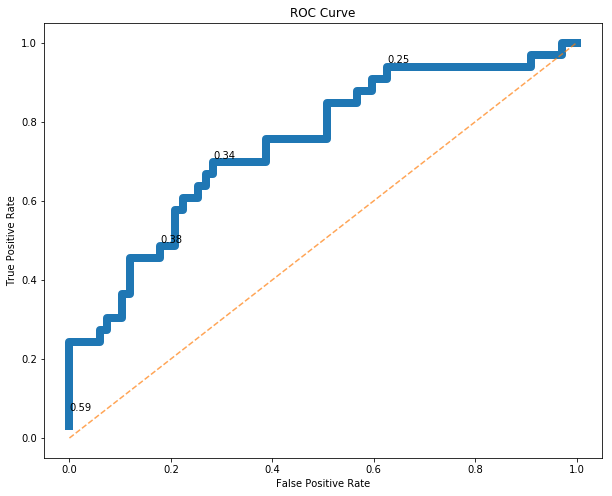

In [33]:
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linewidth=8)
plt.plot([0,1], [0,1], "--", alpha=.7)
for label, x, y in zip(thres[::10], fpr[::10], tpr[::10]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y + .04))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

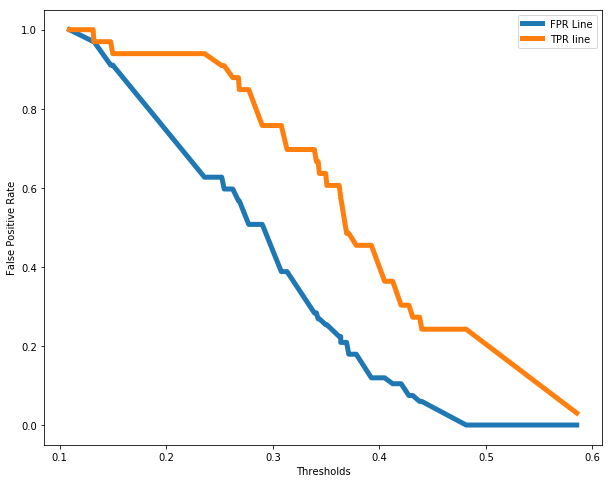

In [34]:
plt.figure(figsize=(10,8))
plt.plot(thres, fpr, linewidth=5, label = "FPR Line")
plt.plot(thres, tpr, linewidth=5, label = "TPR line")
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate")
plt.legend()
plt.show();

In [35]:
labels_70 = np.where(test_probs >= 0.7, 1, 0)
labels_70[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
accuracy_score(y_test, labels_70)

0.67000000000000004

In [37]:
def thres_acc(t, yt, tp):
    labels = np.where(tp>=t, 1, 0)
    return accuracy_score(yt, labels)

In [38]:
#Generate thresholds and pass them into function
thresholds = np.linspace(0, 1, 50)
acc_scores = [thres_acc(i, y_test, test_probs) for i in thresholds]

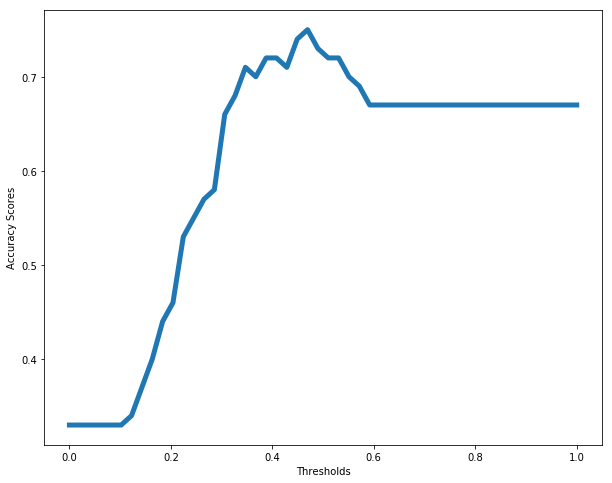

In [39]:
#Plot thresholds vs accuracy scores
plt.figure(figsize=(10,8))
plt.plot(thresholds, acc_scores, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy Scores")
plt.show()

In [40]:
thres_score_dict = dict(zip(thresholds, acc_scores))
sorted(thres_score_dict.items(), key = lambda x:x[1], reverse=True)[0][0]

0.46938775510204078

In [41]:
labels_47 = np.where(test_probs >= 0.47, 1, 0)
labels_47[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
accuracy_score(y_test, labels_47)
# .75 is more accurate than .67 previously at .47 threshold!!

0.75

**Question 5:** Use grid search to determine the K-Neigbors values in a KNN model trained on this dataset and to determine the best max_depth value in a Decision Tree model as well. Which model is better? Use roc_auc as your evaluation metric.

In [368]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline;

In [72]:
#Intialize scalar to scale the data first. They GPA and GRE metrics are different.
scale = StandardScaler()

#Fit and transform scaler on the data
Xs = scale.fit_transform(X)
y = admissions.admit_1

In [65]:
#Intialize parameter grid

#Range of neighbors to test
neighbors_range = range(1, 21, 2)

#Dictionary of parameter values 
param_grid_knn = {}
param_grid_knn["n_neighbors"] = neighbors_range

param_grid_knn

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

In [66]:
#Intialize Grid

grid_knn_s = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid_knn, cv = 5, scoring = "accuracy")

#Fit grid on scaled data
grid_knn_s.fit(Xs, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [67]:
grid_knn_s.grid_scores_

[mean: 0.62972, std: 0.06342, params: {'n_neighbors': 1},
 mean: 0.65491, std: 0.05048, params: {'n_neighbors': 3},
 mean: 0.65743, std: 0.06248, params: {'n_neighbors': 5},
 mean: 0.66247, std: 0.05111, params: {'n_neighbors': 7},
 mean: 0.67758, std: 0.04320, params: {'n_neighbors': 9},
 mean: 0.68010, std: 0.04916, params: {'n_neighbors': 11},
 mean: 0.68262, std: 0.02317, params: {'n_neighbors': 13},
 mean: 0.68010, std: 0.02495, params: {'n_neighbors': 15},
 mean: 0.67254, std: 0.02272, params: {'n_neighbors': 17},
 mean: 0.68262, std: 0.03067, params: {'n_neighbors': 19}]

In [68]:
grid_knn_s.best_score_
#compare with score of DT below..

0.6826196473551638

In [69]:
grid_knn_s.best_params_

{'n_neighbors': 13}

In [70]:
grid_knn_s.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [ ]:
#now with a Decision Tree model...

In [73]:
depths_range = range(2, 20)

#Dictionary of parameter values 
param_grid_dt = {}
param_grid_dt["max_depth"] = depths_range

param_grid_dt

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [74]:
from sklearn.tree import DecisionTreeClassifier
#Intialize Grid

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Fit grid on data

grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [76]:
grid_dt.grid_scores_

[mean: 0.70781, std: 0.05010, params: {'max_depth': 2},
 mean: 0.71537, std: 0.04618, params: {'max_depth': 3},
 mean: 0.66499, std: 0.03795, params: {'max_depth': 4},
 mean: 0.69018, std: 0.03684, params: {'max_depth': 5},
 mean: 0.64484, std: 0.04042, params: {'max_depth': 6},
 mean: 0.61965, std: 0.06279, params: {'max_depth': 7},
 mean: 0.63980, std: 0.03785, params: {'max_depth': 8},
 mean: 0.62720, std: 0.02678, params: {'max_depth': 9},
 mean: 0.60202, std: 0.04733, params: {'max_depth': 10},
 mean: 0.59698, std: 0.04219, params: {'max_depth': 11},
 mean: 0.59698, std: 0.03463, params: {'max_depth': 12},
 mean: 0.60453, std: 0.04989, params: {'max_depth': 13},
 mean: 0.61209, std: 0.02939, params: {'max_depth': 14},
 mean: 0.61209, std: 0.02494, params: {'max_depth': 15},
 mean: 0.60705, std: 0.04459, params: {'max_depth': 16},
 mean: 0.60202, std: 0.04351, params: {'max_depth': 17},
 mean: 0.59194, std: 0.03353, params: {'max_depth': 18},
 mean: 0.59950, std: 0.04403, params: {

In [75]:
grid_dt.best_score_
#compared to the KNN model, DT has a higher accuracy score. 

0.7153652392947103

In [77]:
grid_dt.best_params_

{'max_depth': 3}

In [78]:
grid_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [896]:
p = 0.7153652392947103- 0.6826196473551638

In [900]:
print ("The DecisionTree model is {:.2f}% better than the KNN model".format(p*100))

The DecisionTree model is 3.27% better than the KNN model


**Question 6:** If you work in an admissions department, would you rather have a model that minimizes false negatives or minimizes false positives? Why?

In [ ]:
# I would much rather have a student prove us wrong, than prove us right when it comes to college admissions. 
# The school will benefit more if the student is better suited for the work, therefore, minimizing False Positives
# is a better model to build. We do not want to predict that a student will succeed, and eventually fail. 

**Question 7:** Using the Logistic Regression from Question 4, what is the probability of admission of the following prospective students:

    - Student 1: GRE = 560, GPA = 3.6, Prestige = 2.
    - Student 2: GRE = 750, GPA = 3.8, Prestige = 4.
    - Student 3: GRE = 660, GPA = 3.1, Prestige = 1.

In [86]:
admissions.head()

,gre,gpa,prestige,admit_1
0,380.0,3.61,3.0,0
1,660.0,3.67,3.0,1
2,800.0,4.00,1.0,1
3,640.0,3.19,4.0,1
4,520.0,2.93,4.0,0


In [87]:
student_1 = [[560.0, 3.6, 2.0]]
student_2 = [[750.0, 3.8, 4.0]]
student_3 = [[660.0, 3.1, 1.0]]

In [89]:
student_1_test = lr.predict_proba(student_1)
student_1_test
#there is a 63% chance that this student will not be admitted. 

array([[ 0.63402921,  0.36597079]])

In [91]:
student_2_test = lr.predict_proba(student_2)
student_2_test
#there is a 76% chance that this student will not be admitted. 

array([[ 0.76066639,  0.23933361]])

In [92]:
student_3_test = lr.predict_proba(student_3)
student_3_test
#there is a 52% chance that this student will not be admitted. 

array([[ 0.52437751,  0.47562249]])

In [99]:
student_3_Predict = lr.predict(student_3)
student_3_Predict

array([0], dtype=uint8)

## Section 2: Mystery Dataset

In this section you will work with a "mystery" supervised classification dataset, in that you have no context to work with — the names of the features come from San Francisco neighborhoods but aren't related to anything to San Francisco.

<br>

In this section I want to devise the best possible model with the fewest number of features. Some of the features are informative, while others are junk, your task is to find the good ones while dropping the bad ones.

<br>

I want you to thoroughly test at least three algorithms in order to find the best one with the best parameters.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score;

In [128]:
data = pd.read_csv("../data/homework_2_data.csv", index_col=[0])
data.head()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
0,-3.126509,7.807749,0.959736,-2.248569,4.557675,1.110156,0.617296,0.356864,0.860267,-0.395962,-1.144975,-1.805742,1.498388,2.157730,1
1,0.941629,2.935495,-0.584966,-0.880963,-1.262072,0.120989,3.970787,2.509629,1.400017,0.574335,-3.389879,-0.898020,0.512079,4.340694,1
2,-0.724688,4.192606,-1.139602,0.856972,0.906893,-2.799484,0.584498,3.468955,1.011336,0.839612,-1.384781,-0.241726,1.502255,-1.539356,1
3,-2.641034,6.963189,0.962412,-0.838858,1.549620,-2.335671,-0.838585,1.924333,2.794306,-0.421610,-1.273275,0.833424,2.268457,-0.004678,0
4,1.259116,4.741797,1.084332,0.186698,4.794145,-1.093006,2.161358,3.264167,-0.060052,1.154145,-2.030773,-1.442986,0.588193,0.533464,1


In [129]:
# no context.. which one of these features are the best at predicting the outcome variable..?
# make the best possible model by minimizing number of features in the dataset
# test a bunch of models, and eliminate as many features..
# RANK the features and which one you think are the best..

In [130]:
data.describe()

,haight,mission,soma,sunset,richmond,glen_park,castro,potrero,hayes_valley,fillmore,bernal,marina,north_beach,excelsior,target
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.267225,0.913052,-0.021879,-0.007041,0.488571,0.000533,0.214764,0.473963,0.276314,-0.001805,0.719916,0.016530,0.301720,-0.686948,0.361750
std,1.937676,3.021233,1.000251,1.010572,1.709379,1.699261,1.899664,1.760681,1.797701,0.982354,1.800790,0.991669,1.821065,3.675909,0.480567
min,-6.937360,-12.397333,-4.303971,-3.754228,-6.185402,-6.502010,-8.197095,-5.768151,-5.999394,-3.689324,-6.220787,-3.169294,-5.589536,-13.042620,0.000000
25%,-1.559472,-1.004986,-0.693617,-0.663096,-0.631218,-1.125261,-0.965050,-0.747362,-0.907813,-0.674620,-0.506630,-0.650516,-0.921863,-3.161465,0.000000
50%,-0.272602,1.030225,0.001604,-0.018837,0.538179,0.047370,0.299145,0.495901,0.300742,0.004425,0.717371,0.013667,0.263889,-0.721604,0.000000
75%,0.947680,2.990420,0.645886,0.673647,1.594229,1.132822,1.461197,1.666650,1.480998,0.651688,1.946477,0.661317,1.512332,1.515665,1.000000
max,6.680262,12.031816,3.424344,4.113957,7.032764,6.458744,7.532350,6.954996,6.621243,3.880595,7.368307,3.135799,7.445434,13.432946,1.000000


In [257]:
data.shape

(4000, 15)

# Linear and Lasso for Feature Selection

In [259]:
X = data.drop("target", axis = 1)
y = data.target

In [265]:
#Linear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 45)

lr = LinearRegression()
lr.fit(X_train, y_train)
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

0.267335964881
0.263101587868


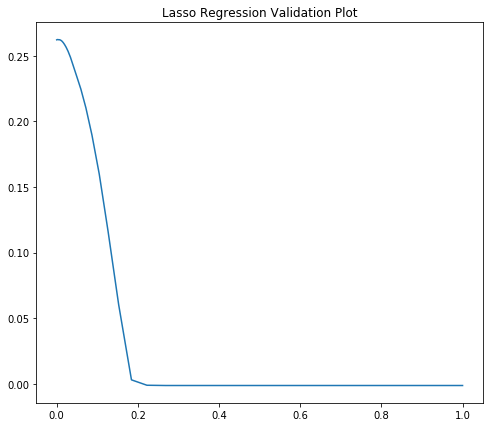

In [291]:
lasso_cv_scores = []

for i in lasso_alphas:
    cv_score = cross_val_score(Lasso(alpha=i), X, y, cv = 5).mean()
    lasso_cv_scores.append(cv_score)

plt.figure(figsize=(8, 7))
plt.title("Lasso Regression Validation Plot")
plt.plot(lasso_alphas, lasso_cv_scores);

In [376]:
#Lasso

lasso = Lasso(alpha= 0.05)
lasso.fit(X_train, y_train)
print lasso.score(X_train, y_train)
print lasso.score(X_test, y_test)

0.239852437004
0.225670104861


In [293]:
coef = lasso.coef_

In [377]:
coef = lasso.coef_
dict(zip(X.columns, coef))

{'bernal': 0.0,
 'castro': 0.025452462491156642,
 'excelsior': 0.035358964585097422,
 'fillmore': 0.0,
 'glen_park': 0.0,
 'haight': -0.028045716912349961,
 'hayes_valley': 0.0,
 'marina': -0.0,
 'mission': 0.0,
 'north_beach': 0.10177186863487887,
 'potrero': -0.015521770962787609,
 'richmond': -0.035292406532755935,
 'soma': 0.0,
 'sunset': -0.0}

In [ ]:
# top 4 features from Lasso Model:
# excelsior, north_beach, richmond, haight

In [255]:
X = data.drop("target", axis = 1)
y = data.target

In [256]:
#null accuracy. Our model accuracy needs to beat 64%.
y.value_counts(normalize=True)

0    0.63825
1    0.36175
Name: target, dtype: float64

In [177]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X, y)
dt.score(X, y)
#over fit?

0.90674999999999994

In [194]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                   random_state = 45)

In [179]:
dt = DecisionTreeClassifier(max_depth= 8)
dt.fit(X_train, y_train)

dt.score(X_test, y_test)

0.80833333333333335

In [180]:
cross_val_score(DecisionTreeClassifier(max_depth=8), X, y, cv = 5, scoring="accuracy").mean()

0.82474134022084411

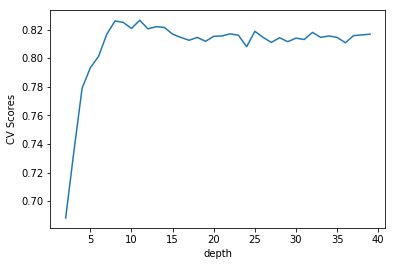

In [292]:
depths = range(2, 40)
cv_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth= depth)
    score = cross_val_score(model, X, y, cv = 5, scoring = "accuracy").mean()
    cv_scores.append(score)
    
plt.plot(depths, cv_scores)
plt.xlabel("depth")
plt.ylabel("CV Scores");

In [190]:
param_grid_dt["min_samples_split"] = [2, 10, 20]
param_grid_dt["max_features"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")
#Fit grid on data
grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 10, 20], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [193]:
grid_dt.best_params_

{'max_depth': 8, 'max_features': 9, 'min_samples_split': 10}

In [192]:
grid_dt.best_score_

0.82775

In [195]:
#re-run the model with best parameters!

dt = DecisionTreeClassifier(max_depth= 8, min_samples_split= 10, max_features= 9)
dt.fit(X_train, y_train)

dt.score(X_test, y_test)

0.79015151515151516

In [196]:
cross_val_score(DecisionTreeClassifier(max_depth=8, min_samples_split= 10, max_features= 9), 
                X, y, cv = 5, scoring="accuracy").mean()

0.81850102109534539

In [416]:
sorted(zip(dt.feature_importances_, X_test.columns), reverse = True)
#We will only take the top 6 features that are impacting this dataset. 

[(0.14617619308679344, 'glen_park'),
 (0.14391312177392621, 'north_beach'),
 (0.12223796978571126, 'richmond'),
 (0.11624613777503841, 'castro'),
 (0.10282329874033677, 'hayes_valley'),
 (0.094310726568547776, 'potrero'),
 (0.077682754372078916, 'excelsior'),
 (0.071858434462603663, 'mission'),
 (0.049999231083277855, 'bernal'),
 (0.046122193597223575, 'haight'),
 (0.011878454300782255, 'marina'),
 (0.01014242524152776, 'soma'),
 (0.0034694473245733617, 'sunset'),
 (0.0031396118875788195, 'fillmore')]

In [341]:
#take the top 6 features here, and re-run the DT model.
new_col_dt = ['glen_park', 'north_beach', 'richmond', 'castro', 'hayes_valley', 'potrero', 'target']

In [342]:
data = pd.read_csv("../data/homework_2_data.csv", index_col=[0])
data_new = data[new_col_dt]
data_new.head()

,glen_park,north_beach,richmond,castro,hayes_valley,potrero,target
0,1.110156,1.498388,4.557675,0.617296,0.860267,0.356864,1
1,0.120989,0.512079,-1.262072,3.970787,1.400017,2.509629,1
2,-2.799484,1.502255,0.906893,0.584498,1.011336,3.468955,1
3,-2.335671,2.268457,1.549620,-0.838585,2.794306,1.924333,0
4,-1.093006,0.588193,4.794145,2.161358,-0.060052,3.264167,1


In [209]:
X = data_new.drop("target", axis = 1)
y = data_new.target

,glen_park,north_beach,richmond,castro,hayes_valley,potrero
0,1.110156,1.498388,4.557675,0.617296,0.860267,0.356864
1,0.120989,0.512079,-1.262072,3.970787,1.400017,2.509629
2,-2.799484,1.502255,0.906893,0.584498,1.011336,3.468955
3,-2.335671,2.268457,1.549620,-0.838585,2.794306,1.924333
4,-1.093006,0.588193,4.794145,2.161358,-0.060052,3.264167


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                   random_state = 45)

In [217]:
param_grid_dt["min_samples_split"] = [2, 10, 20]
param_grid_dt["max_features"] = [1, 2, 3, 4, 5, 6]

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")
#Fit grid on data
grid_dt.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 10, 20], 'max_features': [1, 2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [218]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_features': 6, 'min_samples_split': 20}

In [219]:
grid_dt.best_score_
#having just 6 features gives us a worse score, although it still beats the null accuracy.

0.78225

# AdaBoost Model Selection

In [220]:
from sklearn.ensemble import AdaBoostClassifier
#Intialize AdaBoost with 150 estimators
ada = AdaBoostClassifier(n_estimators=150)
#150 estimators to start.

In [224]:
X = data.drop("target", axis = 1)
y = data.target

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                   random_state = 45)

ada.fit(X_train, y_train)

print (ada.score(X_train, y_train), ada.score(X_test, y_test))

(0.86231343283582085, 0.8113636363636364)


In [226]:
cross_val_score(AdaBoostClassifier(n_estimators=150), 
                X, y, cv = 5, scoring= "accuracy").mean()

0.80074193709677677

In [228]:
#Range of neighbors to test the best depth value in the model
est_range = range(50, 1050, 100)

#Dictionary of parameter values 
param_grid_ada = {}
param_grid_ada["n_estimators"] = est_range


In [230]:
#Intialize Grid
grid_ada = GridSearchCV(AdaBoostClassifier(), 
                       param_grid = param_grid_ada, cv = 5, scoring = "accuracy")

#Fit grid on data
grid_ada.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 150, 250, 350, 450, 550, 650, 750, 850, 950]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [232]:
print grid_ada.best_params_
print grid_ada.best_score_

{'n_estimators': 250}
0.803


In [323]:
cross_val_score(AdaBoostClassifier(n_estimators=250), 
                X, y, cv = 5, scoring= "accuracy").mean()

0.80298724998007809

In [417]:
sorted(zip(ada.feature_importances_, X_test.columns), reverse = True)

[(0.12666666666666668, 'excelsior'),
 (0.12, 'richmond'),
 (0.08666666666666667, 'north_beach'),
 (0.08666666666666667, 'glen_park'),
 (0.080000000000000002, 'haight'),
 (0.080000000000000002, 'fillmore'),
 (0.066666666666666666, 'potrero'),
 (0.066666666666666666, 'castro'),
 (0.066666666666666666, 'bernal'),
 (0.059999999999999998, 'mission'),
 (0.059999999999999998, 'hayes_valley'),
 (0.040000000000000001, 'marina'),
 (0.033333333333333333, 'soma'),
 (0.026666666666666668, 'sunset')]

In [338]:
# We will try to run the model again with the 6 top features from the ADABoost Model
new_col_ada = ['excelsior', 'richmond', 'north_beach', 'glen_park', 'haight', 'fillmore']

In [343]:
print new_col_dt
print new_col_ada

['glen_park', 'north_beach', 'richmond', 'castro', 'hayes_valley', 'potrero', 'target']
['excelsior', 'richmond', 'north_beach', 'glen_park', 'haight', 'fillmore']


In [301]:
X2 = X[new_col2]

In [302]:
#Intialize Grid
grid_ada = GridSearchCV(AdaBoostClassifier(), 
                       param_grid = param_grid_ada, cv = 5, scoring = "accuracy")

#Fit grid on data
grid_ada.fit(X2, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 150, 250, 350, 450, 550, 650, 750, 850, 950]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [303]:
print grid_ada.best_params_
print grid_ada.best_score_

{'n_estimators': 150}
0.7855


In [305]:
sorted(zip(ada.feature_importances_, X2.columns), reverse = True)

[(0.12, 'haight'),
 (0.08666666666666667, 'fillmore'),
 (0.080000000000000002, 'excelsior'),
 (0.059999999999999998, 'richmond'),
 (0.033333333333333333, 'north_beach'),
 (0.026666666666666668, 'glen_park')]

# Random Forest Model Selection

In [311]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [307]:
rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.89318181818181819

In [322]:
estimator_range = range(10, 250, 10)

cv_scores = []

for estimator in estimator_range:
    model = RandomForestClassifier(n_estimators= estimator)
    score = cross_val_score(model, X, y, cv = 5, scoring = "accuracy").mean()
    cv_scores.append(score)

In [315]:
sorted(zip(cv_scores, estimator_range), reverse = True)

[(0.90549488046075077, 220),
 (0.90374737890215451, 240),
 (0.90374456756963684, 190),
 (0.90349487811699714, 210),
 (0.90349331522393006, 230),
 (0.90299612733769885, 200),
 (0.90299456600713446, 180),
 (0.90299394100615782, 170),
 (0.90174768632450986, 130),
 (0.90150018945342103, 140),
 (0.90124737421464718, 160),
 (0.90074331209892533, 110),
 (0.90074237498808585, 70),
 (0.9004976855432586, 90),
 (0.90024300077031383, 100),
 (0.89999112576738405, 150),
 (0.89899018553153986, 120),
 (0.89799737265214463, 60),
 (0.89774331053642276, 80),
 (0.8957454960867125, 50),
 (0.89549455585086846, 40),
 (0.88973767615261889, 30),
 (0.88774579725905822, 20),
 (0.87374265506664861, 10)]

In [316]:
# run model again with best parameters
rf = RandomForestClassifier(n_estimators=220)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                   random_state = 45)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=220, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [317]:
from sklearn.metrics import confusion_matrix

In [319]:
preds = rf.predict(X_test)
cm = confusion_matrix(y_test, preds)
cm = pd.DataFrame(cm)
cm

,0,1
0,779,38
1,101,402


In [332]:
sorted(zip(rf.feature_importances_, X_train.columns), reverse = True)

[(0.11825558293633136, 'north_beach'),
 (0.10967452455951766, 'richmond'),
 (0.10443257880132081, 'glen_park'),
 (0.090402091072399007, 'potrero'),
 (0.085980857447167228, 'excelsior'),
 (0.084360102101654594, 'castro'),
 (0.073277418567490635, 'mission'),
 (0.07233647057560473, 'haight'),
 (0.071994790171561865, 'hayes_valley'),
 (0.069644849197262992, 'bernal'),
 (0.030408516877561281, 'fillmore'),
 (0.030151591386553142, 'sunset'),
 (0.029649953228528078, 'marina'),
 (0.029430673077046568, 'soma')]

In [348]:
# we need to compare ROC_AUC for DT, AdaBoost, and RF models
print cross_val_score(DecisionTreeClassifier(max_depth=8, min_samples_split= 10, max_features= 9), 
                X, y, cv = 5, scoring="roc_auc").mean()
print cross_val_score(AdaBoostClassifier(n_estimators= 250), X, y, cv = 5, scoring="roc_auc").mean()
print cross_val_score(RandomForestClassifier(n_estimators= 220), X, y, cv = 5, scoring="roc_auc").mean()

0.854796641992
0.867364562672
0.960117679355


In [334]:
new_col_rf = ['north_beach', 'richmond', 'glen_park', 'potrero', 'excelsior', 'castro']

# Model Summary

In [344]:
print new_col_dt
print new_col_ada
print new_col_rf

['glen_park', 'north_beach', 'richmond', 'castro', 'hayes_valley', 'potrero', 'target']
['excelsior', 'richmond', 'north_beach', 'glen_park', 'haight', 'fillmore']
['north_beach', 'richmond', 'glen_park', 'potrero', 'excelsior', 'castro']


In [ ]:
# the 3 models seem to have glen_park, north_beach, and richmond consistently. We will run a model with just these.

In [359]:
new_col = ['glen_park', 'north_beach', 'richmond']

In [362]:
XX = X[new_col]

In [364]:
#Range of neighbors to test
Estimator_range = range(10, 250, 10)

#Dictionary of parameter values 
param_grid_rf = {}
param_grid_rf["n_estimators"] = Estimator_range

In [365]:
#Intialize Grid
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid_rf, cv = 5, scoring = "accuracy")

#Fit grid on scaled data
grid_rf.fit(XX, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [373]:
grid_rf.grid_scores_[:5]

[mean: 0.71225, std: 0.02004, params: {'n_estimators': 10},
 mean: 0.72600, std: 0.01825, params: {'n_estimators': 20},
 mean: 0.72650, std: 0.01809, params: {'n_estimators': 30},
 mean: 0.71850, std: 0.00816, params: {'n_estimators': 40},
 mean: 0.71475, std: 0.01565, params: {'n_estimators': 50}]

In [371]:
print grid_rf.best_params_
print grid_rf.best_score_
print grid_rf.best_estimator_

{'n_estimators': 30}
0.7265
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [370]:
y.value_counts(normalize= True)

0    0.63825
1    0.36175
Name: target, dtype: float64

In [374]:
# Rank the top 3 features:
sorted(zip(rf.feature_importances_, XX.columns), reverse = True)

[(0.073277418567490635, 'north_beach'),
 (0.07233647057560473, 'glen_park'),
 (0.029430673077046568, 'richmond')]

In [375]:
print cross_val_score(RandomForestClassifier(n_estimators= 30), XX, y, cv = 5, scoring="roc_auc").mean()

0.761326844844


In [ ]:
# With just 3 features, we are still able to beat the null accuracy score! 

## Section 3: Movie Revenue Prediction

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.

<br>

Once you've made the best possible model, I want you to pick three movies that are set to be released in January or February 2018 and use the model to predict how much revenue those movies will bring in.

In [29]:
movies = pd.read_csv("../data/movie_metadata.csv")

movies.shape

(5043, 28)

In [4]:
movies.gross.mean()

48468407.52680933

In [380]:
# EDA
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [383]:
movies.country.value_counts(normalize= True)[:5]
# we will only use USA.

USA        0.755657
UK         0.088924
France     0.030568
Canada     0.025010
Germany    0.019254
Name: country, dtype: float64

In [901]:
print movies.title_year.min()
print movies.title_year.max()

1920.0
2016.0


In [903]:
print movies.budget.mean()
print movies.budget.median()
print movies.budget.mode()

45854762.1102
25000000.0
0    20000000.0
dtype: float64


In [386]:
movies.color.value_counts()
#drop 

Color               4815
 Black and White     209
Name: color, dtype: int64

In [401]:
movies.content_rating.value_counts()
#keep only Movie Ratings and not TV ratings.

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [916]:
# take a look at what's correlated with Gross.
movies.corr()["gross"].sort_values(ascending = False)

gross                        1.000000
num_voted_users              0.637271
num_user_for_reviews         0.559958
num_critic_for_reviews       0.480601
movie_facebook_likes         0.378082
actor_3_facebook_likes       0.308026
actor_2_facebook_likes       0.262768
duration                     0.250298
cast_total_facebook_likes    0.247400
imdb_score                   0.198021
actor_1_facebook_likes       0.154468
director_facebook_likes      0.144945
budget                       0.102179
aspect_ratio                 0.069346
title_year                   0.030886
facenumber_in_poster        -0.027755
Name: gross, dtype: float64

In [909]:
movies.describe()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_Unrated
count,3801.000000,3801.000000,3801.000000,3801.000000,3.801000e+03,3801.000000,3801.000000,3.801000e+03,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,165.848724,798.599053,763.819521,7673.008419,5.200576e+07,11414.850303,1.379111,4.585476e+07,2002.998421,2003.269666,6.466035,2.110163,9262.204946,0.008945,0.149171,0.345435,0.449619,0.006051
std,123.564807,3051.030222,1884.372443,15448.143479,7.012065e+07,19045.793637,2.052899,2.247196e+08,9.953391,4524.480539,1.057642,0.352354,21359.446963,0.094167,0.356304,0.475573,0.497521,0.077563
min,1.000000,0.000000,0.000000,0.000000,1.620000e+02,0.000000,0.000000,2.180000e+02,1920.000000,0.000000,1.600000,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,11.000000,187.000000,736.000000,7.689458e+06,1865.000000,0.000000,1.000000e+07,1999.000000,374.000000,5.900000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,137.000000,62.000000,433.000000,1000.000000,2.920000e+07,3969.000000,1.000000,2.500000e+07,2005.000000,680.000000,6.600000,2.350000,224.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,223.000000,234.000000,690.000000,13000.000000,6.646637e+07,16143.000000,2.000000,5.000000e+07,2010.000000,975.000000,7.200000,2.350000,11000.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,813.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,656730.000000,43.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [917]:
movies.groupby("genres")['gross'].mean().sort_values(ascending = False)[:5]

genres
Family|Sci-Fi                                      4.349495e+08
Adventure|Animation|Drama|Family|Musical           4.227838e+08
Adventure|Animation|Comedy|Drama|Family|Fantasy    3.564544e+08
Action|Biography|Drama|History|Thriller|War        3.501236e+08
Action|Adventure|Fantasy|Sci-Fi                    2.966848e+08
Name: gross, dtype: float64

In [413]:
movies.genres.nunique()
#over 900 unique genre's with various combinations. We will drop column.

914

In [422]:
movies.plot_keywords.nunique()
#drop

4760

In [421]:
objects = [x for x in movies.columns \
                if not (movies[x].dtype == np.float64 \
                        or movies[x].dtype == np.int64)]
objects
#which ones do we need to create dummies for?

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

In [3]:
# example function to lower, set index, and drop columns
def movies_fe(df):
    df.drop([u'color', u'director_name', u'duration',
       u'genres', u'actor_1_name', u'actor_2_name', u'actor_3_name',
       u'movie_title', u'num_voted_users', u'movie_imdb_link',
       u'num_user_for_reviews', u'plot_keywords'], axis = 1, inplace = True)
    df.columns = df.columns.str.lower()
    return df

In [6]:
movies = pd.read_csv("../data/movie_metadata.csv")

movies_fe(movies)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
num_critic_for_reviews       4993 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
cast_total_facebook_likes    5043 non-null int64
facenumber_in_poster         5030 non-null float64
language                     5031 non-null object
country                      5038 non-null object
content_rating               4740 non-null object
budget                       4551 non-null float64
title_year                   4935 non-null float64
actor_2_facebook_likes       5030 non-null float64
imdb_score                   5043 non-null float64
aspect_ratio                 4714 non-null float64
movie_facebook_likes         5043 non-null int64
dtypes: float64(11), int64(2), object(3)
memory usage: 630.4+ KB


In [7]:
#We will only use movies in the USA in this model..
movies.country = movies.country[movies.country == "USA"]
movies.country.value_counts()

USA    3807
Name: country, dtype: int64

In [8]:
#we will only focus on movies in English
movies.language = movies.language[movies.language == "English"]
movies.language.value_counts()

English    4704
Name: language, dtype: int64

In [9]:
#we'll keep movies that are rated: 'PG-13', 'PG', 'G', 'R', 'Not Rated', 'Unrated'  ONLY.
movies.content_rating = movies.content_rating[movies.content_rating != "TV-14"]
movies.content_rating = movies.content_rating[movies.content_rating != "TV-PG"]
movies.content_rating = movies.content_rating[movies.content_rating != "TV-MA"]
movies.content_rating = movies.content_rating[movies.content_rating != "TV-G"]
movies.content_rating = movies.content_rating[movies.content_rating != "Approved"]
movies.content_rating = movies.content_rating[movies.content_rating != "TV-Y"]
movies.content_rating = movies.content_rating[movies.content_rating != "NC-17"]
movies.content_rating = movies.content_rating[movies.content_rating != "X"]
movies.content_rating = movies.content_rating[movies.content_rating != "TV-Y7"]
movies.content_rating = movies.content_rating[movies.content_rating != "GP"]
movies.content_rating = movies.content_rating[movies.content_rating != "Passed"]
movies.content_rating = movies.content_rating[movies.content_rating != "M"]

In [10]:
movies.content_rating.unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'Not Rated', 'Unrated'], dtype=object)

In [11]:
#encode categorical rating variables
movies_rating_dums = pd.get_dummies(movies.content_rating, prefix = "rating", drop_first = True)
movies = pd.concat([movies, movies_rating_dums], axis = 1)
movies.drop("content_rating", axis = 1, inplace=True)

In [12]:
movies.drop(["language","country"], axis = 1, inplace=True)

In [13]:
movies.dropna(axis = 0, inplace= True)

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801 entries, 0 to 5042
Data columns (total 18 columns):
num_critic_for_reviews       3801 non-null float64
director_facebook_likes      3801 non-null float64
actor_3_facebook_likes       3801 non-null float64
actor_1_facebook_likes       3801 non-null float64
gross                        3801 non-null float64
cast_total_facebook_likes    3801 non-null int64
facenumber_in_poster         3801 non-null float64
budget                       3801 non-null float64
title_year                   3801 non-null float64
actor_2_facebook_likes       3801 non-null float64
imdb_score                   3801 non-null float64
aspect_ratio                 3801 non-null float64
movie_facebook_likes         3801 non-null int64
rating_Not Rated             3801 non-null uint8
rating_PG                    3801 non-null uint8
rating_PG-13                 3801 non-null uint8
rating_R                     3801 non-null uint8
rating_Unrated               3801 non-

In [15]:
df = movies

In [524]:
#now the dataset is ready for modeling.

Use the movie_metadata dataset to fit a regression model to predict gross. Use Linear, Polynomial, Ridge, Lasso regression. Use rMSE as your evaluation metric.



Once you've made the best possible model, I want you to pick three movies that are set to be released in January or February 2018 and use the model to predict how much revenue those movies will bring in.

# Linear Regression Model

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_Unrated
0,723.0,0.0,855.0,1000.0,760505847.0,4834,0.0,237000000.0,2009.0,936.0,7.9,1.78,33000,0,0,1,0,0
1,302.0,563.0,1000.0,40000.0,309404152.0,48350,0.0,300000000.0,2007.0,5000.0,7.1,2.35,0,0,0,1,0,0
2,602.0,0.0,161.0,11000.0,200074175.0,11700,1.0,245000000.0,2015.0,393.0,6.8,2.35,85000,0,0,1,0,0
3,813.0,22000.0,23000.0,27000.0,448130642.0,106759,0.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,0,1,0,0
5,462.0,475.0,530.0,640.0,73058679.0,1873,1.0,263700000.0,2012.0,632.0,6.6,2.35,24000,0,0,1,0,0


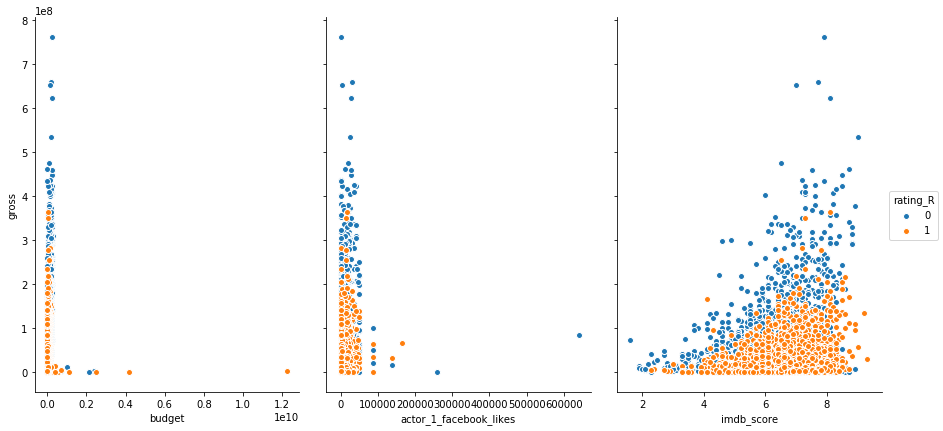

In [19]:
sns.pairplot(df, x_vars=['budget','actor_1_facebook_likes','imdb_score'], y_vars='gross', 
             size=6, aspect=0.7, hue = "rating_R");

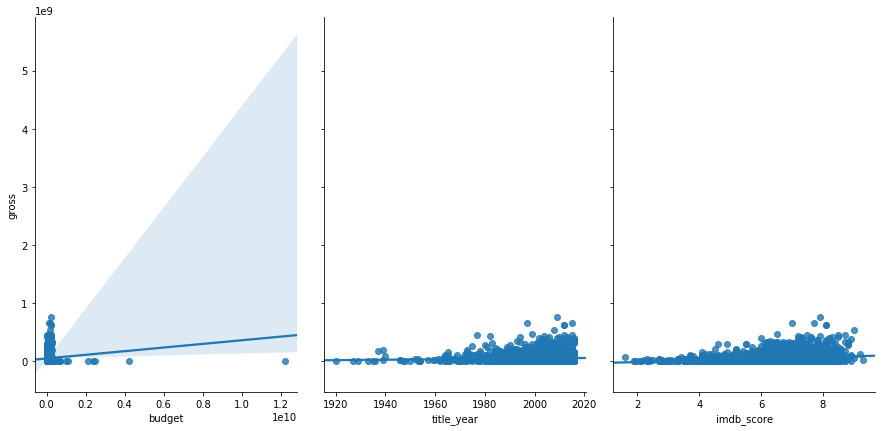

In [18]:
sns.pairplot(df, x_vars=['budget','title_year','imdb_score'], y_vars='gross', size=6, aspect=0.7, kind='reg');
# there are some obvious outliers with budget. There's a more linear relationship with year and imbdb score.

In [150]:
### STATSMODELS ###

# create a fitted model
lm = smf.ols(formula= "gross ~ budget", data = df).fit()

# print the coefficients
lm.params

Intercept    5.056936e+07
budget       3.132504e-02
dtype: float64

In [151]:
df.budget.mean()

45854762.11023415

In [152]:
### STATSMODELS ###

# Let's predict the gross for the average budget of $45 million
X_new = pd.DataFrame({'budget': [45854762.00]})

# predict for a new observation
int(lm.predict(X_new))

# The gross will be about $52,005,758 for a movie with a(n) (average) budget of $45,854,762

52005758

In [318]:
print df.imdb_score.mean()
print df.imdb_score.median()
print df.imdb_score.max()

6.46603525388
6.6
9.3


In [323]:
lm = smf.ols(formula= "gross ~ imdb_score", data = df).fit()

# print the coefficients
print lm.params

Intercept    -3.893026e+07
imdb_score    1.406364e+07
dtype: float64


In [331]:
X_new_imdb = pd.DataFrame({'imdb_score': [7.9]})

In [332]:
df.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_Unrated
0,723.0,0.0,855.0,1000.0,760505847.0,4834,0.0,237000000.0,2009.0,936.0,7.9,1.78,33000,0,0,1,0,0
1,302.0,563.0,1000.0,40000.0,309404152.0,48350,0.0,300000000.0,2007.0,5000.0,7.1,2.35,0,0,0,1,0,0
2,602.0,0.0,161.0,11000.0,200074175.0,11700,1.0,245000000.0,2015.0,393.0,6.8,2.35,85000,0,0,1,0,0
3,813.0,22000.0,23000.0,27000.0,448130642.0,106759,0.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,0,1,0,0
5,462.0,475.0,530.0,640.0,73058679.0,1873,1.0,263700000.0,2012.0,632.0,6.6,2.35,24000,0,0,1,0,0


In [333]:
y.head()

0    760505847.0
1    309404152.0
2    200074175.0
3    448130642.0
5     73058679.0
Name: gross, dtype: float64

In [334]:
# predict for a new observation
int(lm.predict(X_new_imdb))

72172527

In [335]:
760505847.0 - 72172527
# Really off for a single guess..

688333320.0

In [337]:
lm.summary()

# imdb_score does better than budget, but still bad on it's own..

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           6.34e-40
Time:                        14:52:32   Log-Likelihood:                -73973.
No. Observations:                3801   AIC:                         1.480e+05
Df Residuals:                    3799   BIC:                         1.480e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.893e+07   6.89e+06     -5.653      0.000   -5.24e+07   -2.54e+07
imdb_score  1.406e+07   1.05e+06     13.379      0.000     1.2e+07    1.61e+07
==============================================================================
Omnibus:                     2405.530   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32361.262
Skew:                           2.832   Prob(JB):                         0.00
Kurtosis:                      16.124   Cond. No.                         41.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ["budget"]
X = df[feature_cols]
y = df.gross

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

linreg.predict(X_new)

50569356.29022592
[0.03132504]


In [24]:
linreg.predict(X_new)
#the gross for average budget of $45m is about $52m based on this Linear Model.

array([52005758.51298995])

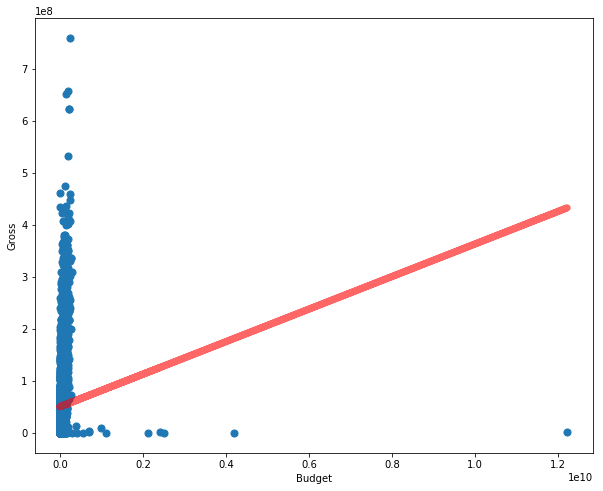

In [25]:
#Make predictions by passing X into model
preds = linreg.predict(X)

plt.figure(figsize=(10, 8))
#Make scatter of X and y
plt.scatter(X,y, s = 50)
#Make line plot of X and preds
plt.plot(X, preds, "r", linewidth= 7, alpha = .6)
plt.xlabel("Budget")
plt.ylabel("Gross");

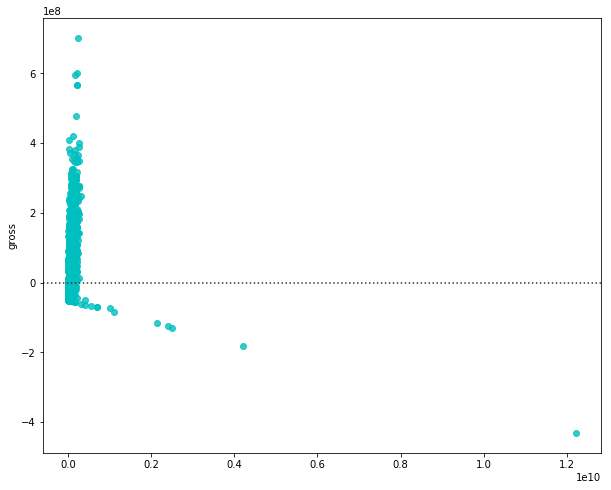

In [26]:
plt.figure(figsize=(10, 8))
sns.residplot(X, y, color="c");

In [27]:
lm.conf_int()

,0,1
Intercept,4.830470e+07,5.283401e+07
budget,2.144958e-02,4.120050e-02


In [28]:
# Budget and Gross shows a positive relationship, although the R-squared confidence is low. Need to add more features.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     38.68
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           5.54e-10
Time:                        11:08:30   Log-Likelihood:                -74041.
No. Observations:                3801   AIC:                         1.481e+05
Df Residuals:                    3799   BIC:                         1.481e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.057e+07   1.16e+06     43.780      0.000    4.83e+07    5.28e+07
budget         0.0313      0.005      6.219      0.000       0.021       0.041
==============================================================================
Omnibus:                     2489.582   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37274.423
Skew:                           2.929   Prob(JB):                         0.00
Kurtosis:                      17.179   Cond. No.                     2.34e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
lm.pvalues
# there is a clear relationship between gross and budget.

Intercept    0.000000e+00
budget       5.544777e-10
dtype: float64

In [30]:
print linreg.score(X, y)

y_pred = linreg.predict(X)
print metrics.r2_score(y, y_pred)

0.01007797981770342
0.01007797981770342


In [34]:
# Multiple Linear Regression using all of the features
X = df.drop(["gross"], axis = 1)
y = df.gross
cross_val_score(LinearRegression(),X, y, cv = 5, scoring = "r2").mean()

-0.2974544122652943

In [42]:
X.shape

(3801, 17)

In [35]:
def lr_model(features):
    X = df[features]
    lr = LinearRegression()
    lr.fit(X, y)
    return lr.score(X, y)

In [36]:
lr_model([u'num_critic_for_reviews', u'director_facebook_likes',
       u'actor_3_facebook_likes', u'actor_1_facebook_likes',
       u'cast_total_facebook_likes', u'facenumber_in_poster', u'budget',
       u'title_year', u'actor_2_facebook_likes', u'imdb_score',
       u'aspect_ratio', u'movie_facebook_likes', u'rating_Not Rated',
       u'rating_PG', u'rating_PG-13', u'rating_R', u'rating_Unrated'])

0.4051572274781259

In [79]:
from itertools import combinations

In [49]:
combos = combinations(df.drop(["gross", "budget"], axis = 1).columns, 10)

In [51]:
scores = []

for i in combos:
    i = list(i)
    score = lr_model(i)
    scores.append(score)

In [52]:
scores_dict = zip(combos,scores)

In [53]:
sorted(scores_dict, key = lambda x:x[1], reverse=True)[0]
# R-Squared of 0.4 with 10 features relative to 0.41 with all 17 features.

(('num_critic_for_reviews',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'cast_total_facebook_likes',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'rating_Not Rated',
  'rating_PG',
  'rating_R'),
 0.40069911991594787)

In [372]:
top_11_lr = ['budget', 'num_critic_for_reviews',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'cast_total_facebook_likes',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'rating_Not Rated',
  'rating_PG',
  'rating_R']

#based on the linear regression model, these are the top 10 combination of features. Manually included budget as well

In [373]:
# new dataframe
lr_top11 = df[top_11_lr]
lr_top11.head()

,budget,num_critic_for_reviews,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,title_year,actor_2_facebook_likes,imdb_score,rating_Not Rated,rating_PG,rating_R
0,237000000.0,723.0,855.0,1000.0,4834,2009.0,936.0,7.9,0,0,0
1,300000000.0,302.0,1000.0,40000.0,48350,2007.0,5000.0,7.1,0,0,0
2,245000000.0,602.0,161.0,11000.0,11700,2015.0,393.0,6.8,0,0,0
3,250000000.0,813.0,23000.0,27000.0,106759,2012.0,23000.0,8.5,0,0,0
5,263700000.0,462.0,530.0,640.0,1873,2012.0,632.0,6.6,0,0,0


In [374]:
# Statsmodel 
lm = smf.ols(formula= "gross ~ budget + num_critic_for_reviews + actor_3_facebook_likes + actor_1_facebook_likes + cast_total_facebook_likes + title_year + actor_2_facebook_likes + rating_PG + rating_R", data = df).fit()

In [375]:
lm.params

Intercept                    2.517526e+09
budget                       1.177588e-02
num_critic_for_reviews       2.781956e+05
actor_3_facebook_likes      -1.248359e+04
actor_1_facebook_likes      -1.156819e+04
cast_total_facebook_likes    1.163975e+04
title_year                  -1.255770e+06
actor_2_facebook_likes      -1.086970e+04
rating_PG                    2.194132e+07
rating_R                    -2.882374e+07
dtype: float64

In [376]:
print lm.pvalues

Intercept                     3.259493e-37
budget                        3.044577e-03
num_critic_for_reviews       1.400330e-218
actor_3_facebook_likes        6.392986e-20
actor_1_facebook_likes        1.500056e-44
cast_total_facebook_likes     2.321725e-45
title_year                    5.625050e-37
actor_2_facebook_likes        1.107140e-35
rating_PG                     6.706800e-16
rating_R                      9.861238e-49
dtype: float64


In [377]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     273.6
Date:                Tue, 16 Jan 2018   Prob (F-statistic):               0.00
Time:                        20:59:04   Log-Likelihood:                -73110.
No. Observations:                3801   AIC:                         1.462e+05
Df Residuals:                    3791   BIC:                         1.463e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2.518e+09   1.95e+08     12.885      0.000    2.13e+09     2.9e+09
budget                        0.0118      0.004      2.965      0.003       0.004       0.020
num_critic_for_reviews     2.782e+05   8242.615     33.751      0.000    2.62e+05    2.94e+05
actor_3_facebook_likes    -1.248e+04   1358.592     -9.189      0.000   -1.51e+04   -9819.951
actor_1_facebook_likes    -1.157e+04    815.425    -14.187      0.000   -1.32e+04   -9969.481
cast_total_facebook_likes  1.164e+04    812.608     14.324      0.000       1e+04    1.32e+04
title_year                -1.256e+06   9.78e+04    -12.841      0.000   -1.45e+06   -1.06e+06
actor_2_facebook_likes    -1.087e+04    862.784    -12.598      0.000   -1.26e+04   -9178.134
rating_PG                  2.194e+07   2.71e+06      8.111      0.000    1.66e+07    2.72e+07
rating_R                  -2.882e+07   1.94e+06    -14.883      0.000   -3.26e+07    -2.5e+07
==============================================================================
Omnibus:                     1870.172   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21584.503
Skew:                           2.059   Prob(JB):                         0.00
Kurtosis:                      13.924   Cond. No.                     5.05e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
X_new = pd.DataFrame({'budget': [45854762.00]})
X_new

,budget
0,45854762.0


In [95]:
# Test X_new2

X_new2 = df[top_11_lr]
print X_new2.iloc[0]
print X_new2.shape

budget                       237000000.0
num_critic_for_reviews             723.0
actor_3_facebook_likes             855.0
actor_1_facebook_likes            1000.0
cast_total_facebook_likes         4834.0
title_year                        2009.0
actor_2_facebook_likes             936.0
imdb_score                           7.9
rating_Not Rated                     0.0
rating_PG                            0.0
rating_R                             0.0
Name: 0, dtype: float64
(3801, 11)


In [105]:
# Let's predict the gross for the first user of our dataset using just the top 10 cominations of features!

X_new2 = pd.DataFrame({'budget': [237000000],
 'num_critic_for_reviews': [723],
 'actor_3_facebook_likes': [855],
 'actor_1_facebook_likes': [1000],
 'cast_total_facebook_likes': [4834],
 'title_year': [2009],
 'actor_2_facebook_likes': [936],
 'imdb_score': [7.9],
 'rating_Not Rated': [0],
 'rating_PG': [0],
 'rating_R': [0]})

In [114]:
y.head()

0    760505847.0
1    309404152.0
2    200074175.0
3    448130642.0
5     73058679.0
Name: gross, dtype: float64

In [106]:
### STATSMODELS ###

# predict for a new observation
int(lm.predict(X_new2))

222461646

In [118]:
int(lm.predict(X_new2))
#the gross for average budget of $45m is about $52m based on this Linear Model.

222461646

In [115]:
760505847 - 222461646

# Wow, we are off by $538,044,201

538044201

In [ ]:
# Let's keep working on different models. 

# Linear, Ridge, Lasso Regression Models

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [276]:
df.shape

(3801, 18)

In [277]:
X = df.drop("gross", axis = 1)
y = df.gross

In [278]:
lr = LinearRegression()
lr.fit(X, y)

print("Linear Regression score is "), lr.score(X, y)

ridge = Ridge(alpha= .4)
ridge.fit(X, y)

print("Ridge Regression score is "), ridge.score(X, y)

lasso = Lasso(alpha=.8)
lasso.fit(X, y)

print("Lasso Regression score is "), lasso.score(X, y)

Linear Regression score is  0.4051572274781259
Ridge Regression score is  0.4051556269141605
Lasso Regression score is  0.40513881979300725


In [279]:
#Make train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 888)

In [185]:
#Linear

lr = LinearRegression()
lr.fit(X_train, y_train)
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

0.37586093136047094
0.43049304399489013


In [186]:
#Ridge

ridge = Ridge(alpha=.4)
ridge.fit(X_train, y_train)
print ridge.score(X_train, y_train)
print ridge.score(X_test, y_test)

0.3758573473076394
0.4304800947151536


In [187]:
#Lasso

lasso = Lasso(alpha=20000)
lasso.fit(X_train, y_train)
print lasso.score(X_train, y_train)
print lasso.score(X_test, y_test)

0.37576779478871225
0.42909235477947744


In [188]:
coef = lasso.coef_

In [190]:
#Zip column names and coef
dict(sorted(zip(coef, X.columns)), reverse = False)

{-45936124.45619906: 'rating_Not Rated',
 -36671734.6972763: 'rating_Unrated',
 -25910030.894074146: 'rating_R',
 -1054230.8144572184: 'title_year',
 -950031.7878907718: 'facenumber_in_poster',
 -8822.949234156198: 'actor_1_facebook_likes',
 -8349.602243564877: 'actor_2_facebook_likes',
 -8017.927157568993: 'actor_3_facebook_likes',
 0.006747152813736326: 'budget',
 100.42016132539746: 'movie_facebook_likes',
 480.9813684618588: 'director_facebook_likes',
 8870.689410272815: 'cast_total_facebook_likes',
 218750.85948381454: 'num_critic_for_reviews',
 4052905.435277886: 'imdb_score',
 4380488.30682882: 'aspect_ratio',
 5506449.5075379815: 'rating_PG-13',
 23092397.777739223: 'rating_PG',
 'reverse': False}

In [290]:
# Combinations via itertools

combos = combinations(X.drop(['director_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster'], axis = 1).columns, 12)

In [291]:
combos = list(combos)

In [292]:
def ls_model(features):
    X = df[features]
    lr = LinearRegression()
    lr.fit(X, y)
    return lr.score(X, y)

In [293]:
scores = []

for i in combos:
    i = list(i)
    score = lr_model(i)
    scores.append(score)
    
scores_dict = zip(combos,scores)

sorted(scores_dict, key = lambda x:x[1], reverse=True)[0]
# R-Squared of 0.37 with 12 features relative to 0.41 with all 17 features.

(('num_critic_for_reviews',
  'actor_3_facebook_likes',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'movie_facebook_likes',
  'rating_Not Rated',
  'rating_PG',
  'rating_PG-13',
  'rating_R',
  'rating_Unrated'),
 0.37137527035394113)

In [294]:
# further drop weak coeficients from the lasso model. Surprisingly "budget" is insignificant!

cols = ['num_critic_for_reviews',
  'actor_3_facebook_likes',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'movie_facebook_likes',
  'rating_Not Rated',
  'rating_PG',
  'rating_PG-13',
  'rating_R',
  'rating_Unrated']

XX = X[cols]
print XX.shape

(3801, 12)


In [303]:
lr = LinearRegression()
lr.fit(XX, y)

print("Linear Regression score is "), lr.score(XX, y)

ridge = Ridge(alpha= 0)
ridge.fit(XX, y)

print("Ridge Regression score is "), ridge.score(XX, y)

lasso = Lasso(alpha=1)
lasso.fit(XX, y)

print("Lasso Regression score is "), lasso.score(XX, y)

Linear Regression score is  0.3713752703540063
Ridge Regression score is  0.3713752703540063
Lasso Regression score is  0.37137527035394113


In [296]:
b = X["budget"]

In [313]:
ridge_alphas = np.logspace(-5, 0, 50)

In [314]:
ridge_alphas

array([1.00000000e-05, 1.26485522e-05, 1.59985872e-05, 2.02358965e-05,
       2.55954792e-05, 3.23745754e-05, 4.09491506e-05, 5.17947468e-05,
       6.55128557e-05, 8.28642773e-05, 1.04811313e-04, 1.32571137e-04,
       1.67683294e-04, 2.12095089e-04, 2.68269580e-04, 3.39322177e-04,
       4.29193426e-04, 5.42867544e-04, 6.86648845e-04, 8.68511374e-04,
       1.09854114e-03, 1.38949549e-03, 1.75751062e-03, 2.22299648e-03,
       2.81176870e-03, 3.55648031e-03, 4.49843267e-03, 5.68986603e-03,
       7.19685673e-03, 9.10298178e-03, 1.15139540e-02, 1.45634848e-02,
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00])

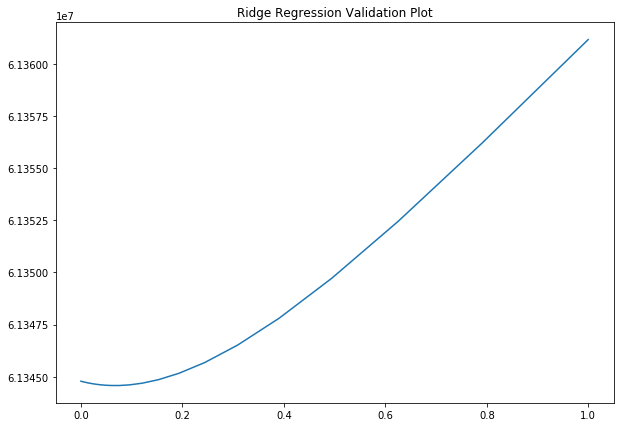

In [315]:
ridge_cv_scores = []

for alpha in ridge_alphas:
    cv_score = cross_val_score(Ridge(alpha= alpha), XX, y, cv = 5, scoring = "neg_mean_squared_error")
    cv_score1 = np.sqrt(abs(cv_score)).mean() # return average RMSE
    ridge_cv_scores.append(cv_score1)

plt.figure(figsize=(10, 7))
plt.title("Ridge Regression Validation Plot")
plt.plot(ridge_alphas, ridge_cv_scores);

In [251]:
# the lowest RMSE for Ridge is around .0 ish..

In [316]:
#Alpha values for lasso model
lasso_alphas = np.logspace(-5, 0, 50)

In [317]:
lasso_alphas

array([1.00000000e-05, 1.26485522e-05, 1.59985872e-05, 2.02358965e-05,
       2.55954792e-05, 3.23745754e-05, 4.09491506e-05, 5.17947468e-05,
       6.55128557e-05, 8.28642773e-05, 1.04811313e-04, 1.32571137e-04,
       1.67683294e-04, 2.12095089e-04, 2.68269580e-04, 3.39322177e-04,
       4.29193426e-04, 5.42867544e-04, 6.86648845e-04, 8.68511374e-04,
       1.09854114e-03, 1.38949549e-03, 1.75751062e-03, 2.22299648e-03,
       2.81176870e-03, 3.55648031e-03, 4.49843267e-03, 5.68986603e-03,
       7.19685673e-03, 9.10298178e-03, 1.15139540e-02, 1.45634848e-02,
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00])

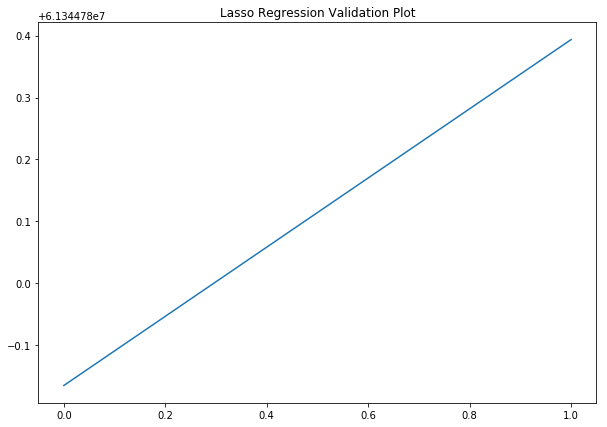

In [318]:
lasso_cv_scores = []

for i in lasso_alphas:
    cv_score = cross_val_score(Lasso(alpha=i), XX, y, cv = 5, scoring = "neg_mean_squared_error")
    cv_score1 = np.sqrt(abs(cv_score)).mean() # return average RMSE
    lasso_cv_scores.append(cv_score1)
    
plt.figure(figsize=(10, 7))
plt.title("Lasso Regression Validation Plot")
plt.plot(lasso_alphas, lasso_cv_scores);

In [319]:
# Using CV Score for Ridge here... optimal around 1.3 alpha

alpha_range = np.logspace(-10, 0, 50)

RMSE_scores = []

for alpha in alpha_range:
    reg = Ridge(alpha = alpha, random_state=123)
    MSE_scores = cross_val_score(reg, XX, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

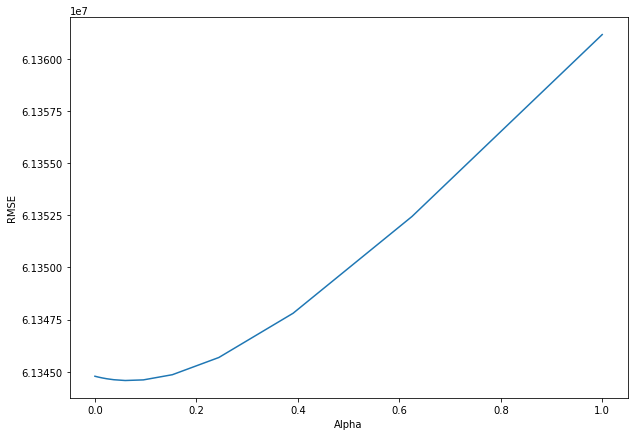

In [320]:
# plot n_alphas (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(alpha_range, RMSE_scores)
plt.xlabel('Alpha')
plt.ylabel('RMSE');

In [321]:
sorted(zip(RMSE_scores, alpha_range), reverse= False)[:5]

[(61344575.01380588, 0.059636233165946365),
 (61344604.24021666, 0.09540954763499963),
 (61344612.387400374, 0.03727593720314938),
 (61344659.17955877, 0.023299518105153717),
 (61344698.021945655, 0.014563484775012445)]

In [322]:
alpha_range = np.logspace(-10, 0, 50)

RMSE_scores = []

for alpha in alpha_range:
    reg = Lasso(alpha = alpha, random_state=123)
    MSE_scores = cross_val_score(reg, XX, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

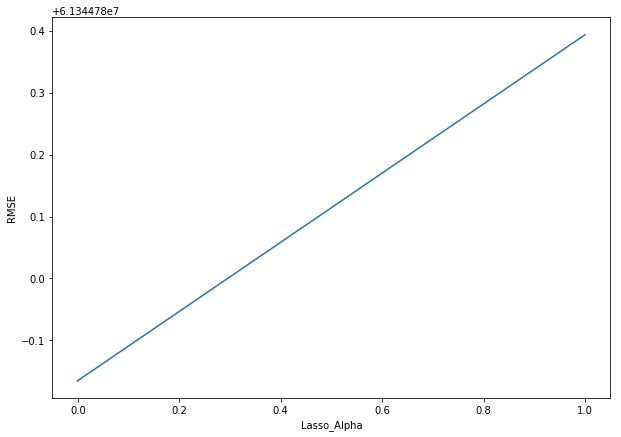

In [323]:
# plot n_alphas (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(alpha_range, RMSE_scores)
plt.xlabel('Lasso_Alpha')
plt.ylabel('RMSE');

# Polynomial Regression Model

In [131]:
import warnings
warnings.filterwarnings("ignore")

In [136]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score;

In [324]:
X.shape

(3801, 17)

In [325]:
poly = PolynomialFeatures(degree=2)
pX = poly.fit_transform(X_train) 
pX_test = poly.fit_transform(X_test) 
lr.fit(pX, y_train)
lr.score(pX_test,y_test)

0.4397093284489696

In [326]:
y_pred = lr.predict(pX_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

59644657.14164279

# Predict New Movies

In [428]:
cols = ['num_critic_for_reviews',
 'actor_3_facebook_likes',
 'budget',
 'actor_2_facebook_likes',
 'movie_facebook_likes',
 'rating_PG-13',
 'rating_R']

In [429]:
### SCIKIT-LEARN ###

# create X and y

X = df[cols]
y = df.gross

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_
print linreg.score(X, y)

31786429.101001933
[ 2.33442903e+05  5.14322338e+03  1.25489555e-02  1.05216378e+03
  8.51321430e+01 -1.56674630e+07 -4.55608114e+07]
0.33032028561411464


In [430]:
# Proud Mary (2018)
# http://www.imdb.com/title/tt6421110/?ref_=tt_rt

movie_1 = pd.DataFrame({'num_critic_for_reviews': [723],
 'actor_3_facebook_likes': [12],
 'budget': [14000000],                       
 'actor_2_facebook_likes': [573],
 'movie_facebook_likes': [751],                     
 'rating_PG-13': [0],
 'rating_R': [1]})

In [431]:
int(linreg.predict(movie_1))

121077531

In [ ]:
# My prediction for Proud Mary is $121,077,531
# Box Office
# Budget:$14,000,000 (estimated)
# Gross USA: $11,701,440, 15 January 2018

In [437]:
# The Post (2017)
# http://www.imdb.com/title/tt6294822/?ref_=fn_al_tt_1

movie_2 = pd.DataFrame({'num_critic_for_reviews': [6996],
 'actor_3_facebook_likes': [12],
 'budget': [50000000],
 'actor_2_facebook_likes': [15000],
 'movie_facebook_likes': [7000],
 'rating_PG-13': [1],
 'rating_R': [0]})

In [438]:
int(linreg.predict(movie_2))

3526412415

In [ ]:
# My prediction for The Post is $3,526,412,415!!!
#  $30,129,074 is the cumulative world wide gross. :/

# Decision Tree & Random Forest Model | Feature Engineering [cheat code!]

In [638]:
X = df.drop("gross", axis = 1)
y = df.gross
y.mean()
# Average Gross per movie is about $50 Million.

52005758.516443044

In [670]:
# Scaled the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#Fit data on scalers
ss.fit(X);

In [676]:
X_ss = ss.transform(X)
X_mm = mm.transform(X)

X_ss = pd.DataFrame(X_ss, columns = X.columns)

X_ss.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_Unrated
0,4.509574,-0.261782,0.048394,-0.432019,-0.345573,-0.671875,0.850706,0.603048,-0.235919,1.355991,-0.937143,1.111495,-0.095004,-0.418718,1.376553,-0.903837,-0.078025
1,1.102006,-0.077230,0.125353,2.092889,1.939536,-0.671875,1.131092,0.402085,0.662424,0.599492,0.680759,-0.433692,-0.095004,-0.418718,1.376553,-0.903837,-0.078025
2,3.530201,-0.261782,-0.319947,0.215393,0.014974,-0.184695,0.886311,1.205936,-0.355948,0.315805,0.680759,3.546335,-0.095004,-0.418718,1.376553,-0.903837,-0.078025
3,5.238032,6.949846,11.801863,1.251253,5.006706,-0.671875,0.908564,0.904492,4.641305,1.923366,0.680759,7.245420,-0.095004,-0.418718,1.376553,-0.903837,-0.078025
4,2.397044,-0.106076,-0.124100,-0.455326,-0.501061,-0.184695,0.969537,0.904492,-0.303118,0.126680,0.680759,0.690080,-0.095004,-0.418718,1.376553,-0.903837,-0.078025


In [639]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [677]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 5-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth = depth, random_state=234)
    MSE_scores = cross_val_score(treereg, X_ss, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

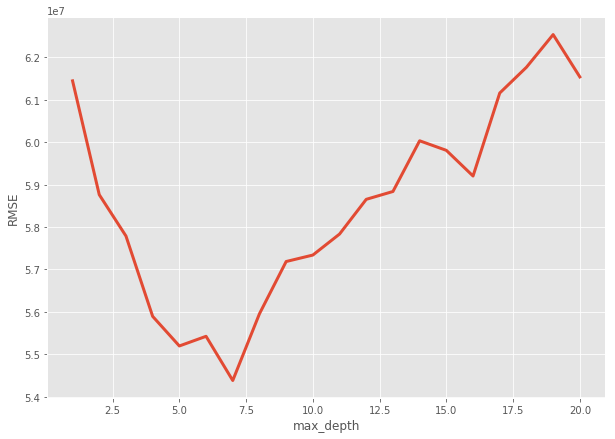

In [678]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(max_depth_range, RMSE_scores, linewidth = 3)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

In [679]:
# best at 7th depth level. Previously used Accuracy as score in the first Decision Tree Regression notebook.
sorted(zip(RMSE_scores, max_depth_range))[0]

(54380289.747209117, 7)

In [680]:
treereg = DecisionTreeRegressor(max_depth=7, random_state = 123)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best')

In [681]:
# feature importances. The Not Rated, PG-13, and Unrated features have no impact to gross income.
fi = pd.DataFrame({'feature':X.columns, 
              'importance':treereg.feature_importances_}).sort_values('importance', 
                                                               ascending = False)
fi

,feature,importance
6,budget,0.486061
0,num_critic_for_reviews,0.207669
7,title_year,0.071794
9,imdb_score,0.057036
11,movie_facebook_likes,0.032394
10,aspect_ratio,0.027089
13,rating_PG,0.019590
4,cast_total_facebook_likes,0.019533
14,rating_PG-13,0.019475
2,actor_3_facebook_likes,0.016322


In [665]:
from sklearn.ensemble import RandomForestRegressor

#Intialize
rfreg = RandomForestRegressor()
#Show model details
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [682]:
# list of values to try for n_estimators
estimator_range = range(10, 210, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators. Will take a while.

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=67)
    MSE_scores = cross_val_score(rfreg, X_ss, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores))) 

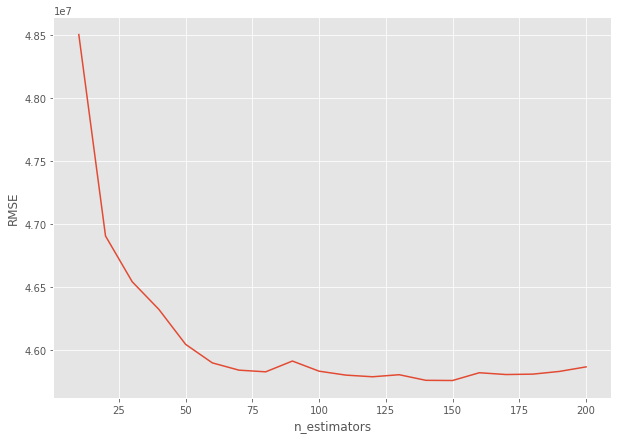

In [683]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [684]:
sorted(zip(RMSE_scores, estimator_range))[0]

(45759303.525246471, 150)

In [705]:
# list of values to try for max_features
feature_range = range(1, len(X.columns)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 5-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=150, max_features=feature, random_state=237)
    MSE_scores = cross_val_score(rfreg, X_ss, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores))) 

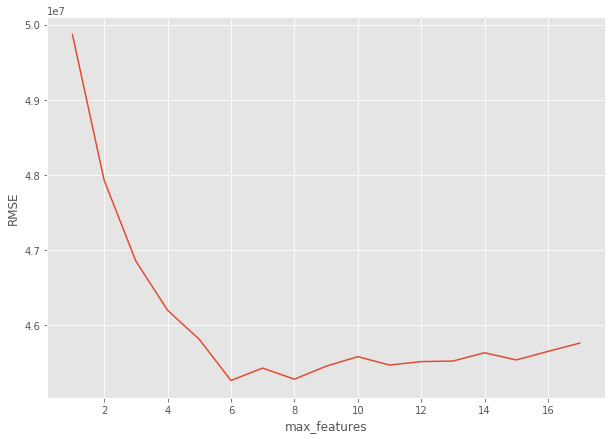

In [706]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE');

In [689]:
sorted(zip(RMSE_scores, feature_range))[0]

(45264916.312656596, 6)

In [707]:
rfreg.fit(X_ss, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=17, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=237,
           verbose=0, warm_start=False)

In [708]:
sorted(zip(rfreg.feature_importances_, X_ss.columns), reverse= True)

[(0.39274057523315736, 'budget'),
 (0.1582851196021299, 'num_critic_for_reviews'),
 (0.081233277881705701, 'imdb_score'),
 (0.06711073408904078, 'title_year'),
 (0.051864677765706774, 'movie_facebook_likes'),
 (0.044065362264827573, 'actor_3_facebook_likes'),
 (0.03661743782780514, 'cast_total_facebook_likes'),
 (0.035728153979904531, 'actor_2_facebook_likes'),
 (0.033916067511568823, 'director_facebook_likes'),
 (0.028022929988190129, 'actor_1_facebook_likes'),
 (0.023649161294771209, 'aspect_ratio'),
 (0.015031537495380255, 'facenumber_in_poster'),
 (0.014065945880664248, 'rating_R'),
 (0.011550500735091019, 'rating_PG'),
 (0.0060608779073120997, 'rating_PG-13'),
 (3.8415089015857969e-05, 'rating_Not Rated'),
 (1.9225453728399995e-05, 'rating_Unrated')]

In [594]:
movies.gross.min()

162.0

In [595]:
movies.gross.max()

760505847.0

In [596]:
movies.gross.median()

25592632.0

In [700]:
movies.gross.mode()

0      3000000.0
1      5773519.0
2      8000000.0
3     34964818.0
4     47000000.0
5    144512310.0
6    177343675.0
7    218051260.0
dtype: float64

In [597]:
movies.gross.mean()

48589701.47011856

In [601]:
movies.gross.std()

68470764.58829561

In [711]:
fi_1 = ['budget', 'num_critic_for_reviews', 'rating_R', 'imdb_score', 'movie_facebook_likes', 'title_year']
XX = X[fi_1]

In [712]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=6, random_state=1)
scores = cross_val_score(rfreg, XX, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

46604787.306000181

In [ ]:
# +/_ ~$47 million with a RF model, which is basically the average gross across the dataset...

## Bonus!!

<br>

Code a K-Nearest Neighbors model from scratch using just python, that means no external libraries such as numpy. This may seem daunting but it's a lot easier than you think. Hint: Use a Class to create the algorithm.